<a href="https://colab.research.google.com/github/saidrishya/CNN_Code_Examples/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [9]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [10]:
y_train = y_train.reshape(-1,)
y_train.shape
#changing it from 2d to 1d

(50000,)

In [3]:
#X.shape = m, height, width, channels
X_test.shape

(10000, 32, 32, 3)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "dear", "dog", "frog","horse","ship", "truck"]

In [11]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

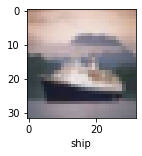

In [14]:
plot_sample(X_train, y_train, 888)

In [16]:
#normalize the data
X_train = X_train / 255
X_test = X_test/ 255

In [18]:
#build an ANN 
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD', 
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8081 - accuracy: 0.3554
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6189 - accuracy: 0.4293
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5405 - accuracy: 0.4555
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4794 - accuracy: 0.4791
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4299 - accuracy: 0.4961
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3901 - accuracy: 0.5097
Epoch 7/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3497 - accuracy: 0.5262
Epoch 8/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3170 - accuracy: 0.5350
Epoch 9/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2821 - accuracy: 0.5469
Epoch 10/100
1563/1563 [==============================] - 7s 5ms/step - l

In [19]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1399 - accuracy: 0.5801


[2.139881134033203, 0.5800999999046326]

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      1000
           1       0.70      0.68      0.69      1000
           2       0.43      0.55      0.48      1000
           3       0.40      0.42      0.41      1000
           4       0.52      0.49      0.51      1000
           5       0.48      0.46      0.47      1000
           6       0.68      0.60      0.64      1000
           7       0.62      0.65      0.63      1000
           8       0.70      0.71      0.70      1000
           9       0.61      0.60      0.61      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



In [22]:
#CNN
#has a couple of layers, convolution+relu, pooling, convolution+relu, pooling
cnn = models.Sequential([
    
    #cnn figures out the filters for you, just mention the size and how many filters you want
    layers.Conv2D(filters=32, kernel_size = (3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


In [23]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.4793 - accuracy: 0.4714
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1149 - accuracy: 0.6100
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9915 - accuracy: 0.6540
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9191 - accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8544 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8036 - accuracy: 0.7206
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7590 - accuracy: 0.7356
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7192 - accuracy: 0.7508
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6859 - accuracy: 0.7618
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.64

In [25]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8985 - accuracy: 0.6979


[0.8985251188278198, 0.6978999972343445]

In [26]:
y_test.shape

(10000, 1)

In [28]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

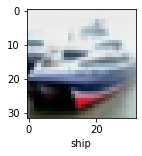

In [29]:
plot_sample(X_test, y_test, 1)

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.33320599e-05, 3.86649663e-05, 1.36106205e-03, 9.26288664e-01,
        2.75596656e-04, 6.27537444e-02, 4.10370808e-03, 1.93231754e-04,
        3.49288923e-03, 1.43909338e-03],
       [1.04181054e-04, 3.61929417e-01, 5.55481529e-06, 1.05047332e-06,
        1.91231970e-06, 4.77270889e-09, 4.48653870e-09, 7.36324353e-08,
        6.35160506e-01, 2.79725250e-03],
       [1.97169781e-02, 8.77105817e-02, 1.23930641e-03, 4.90728626e-03,
        6.26422290e-04, 4.10873981e-05, 1.16037409e-05, 1.03845043e-04,
        8.62834036e-01, 2.28088647e-02],
       [4.75446552e-01, 1.82256941e-02, 4.00471538e-02, 3.20346490e-03,
        1.03026498e-02, 9.01754618e-07, 3.63601604e-04, 2.50990142e-05,
        4.52350110e-01, 3.47669957e-05],
       [1.20732557e-05, 7.71324085e-06, 5.70898550e-03, 1.93681419e-02,
        5.54052591e-01, 1.15255360e-03, 4.19525474e-01, 1.87851390e-06,
        1.61649950e-04, 8.96029815e-06]], dtype=float32)

In [33]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

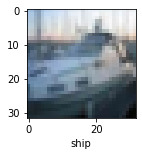

In [39]:
plot_sample(X_test, y_test, 2)

In [40]:
classes[y_classes[2]]

'ship'

In [41]:
print("classification Report: \n", classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.81      0.81      0.81      1000
           2       0.61      0.61      0.61      1000
           3       0.55      0.43      0.48      1000
           4       0.66      0.62      0.64      1000
           5       0.57      0.67      0.61      1000
           6       0.81      0.73      0.77      1000
           7       0.78      0.72      0.75      1000
           8       0.79      0.80      0.79      1000
           9       0.68      0.84      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

